In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import acquire
from env import get_connection
from prepare import train_val_test
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
telco = acquire.get_telco_data(get_connection)
telco = telco.drop(['Unnamed: 0','gender', 'senior_citizen', 'partner', 'phone_service', 'tech_support', 'streaming_tv', 
                    'streaming_movies', 'paperless_billing', 'internet_service_type', 'online_security', 'online_backup', 
                    'device_protection', 'internet_service_type_id', 'customer_id', 'contract_type', 'payment_type'], axis =1)
telco
# Aquiring the Telco data and dropping unnecessary columns to give a dataframe containing the dataset

,payment_type_id,contract_type_id,dependents,tenure,multiple_lines,monthly_charges,total_charges,churn
0,2,2,Yes,9,No,65.60,593.3,No
1,2,1,No,9,Yes,59.90,542.4,No
2,1,1,No,4,No,73.90,280.85,Yes
3,1,1,No,13,No,98.00,1237.85,Yes
4,2,1,No,3,No,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...
7038,2,2,No,13,No,55.15,742.9,No
7039,1,1,No,22,Yes,85.10,1873.7,Yes
7040,2,1,No,2,No,50.30,92.75,No
7041,2,3,Yes,67,No,67.85,4627.65,No


In [9]:
telco = telco.dropna()
telco['total_charges'] = telco['total_charges'].replace(' ', 0).astype(float)
# Dropping any null values and converting all the remaining numbers into floats
# Makes it easier to use stats to ttest the charges and churn

In [10]:
telco['dependents'] = np.where(telco['dependents'] == 'Yes', 1, 0)
telco

,payment_type_id,contract_type_id,dependents,tenure,multiple_lines,monthly_charges,total_charges,churn
0,2,2,1,9,No,65.60,593.30,No
1,2,1,0,9,Yes,59.90,542.40,No
2,1,1,0,4,No,73.90,280.85,Yes
3,1,1,0,13,No,98.00,1237.85,Yes
4,2,1,0,3,No,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...
7038,2,2,0,13,No,55.15,742.90,No
7039,1,1,0,22,Yes,85.10,1873.70,Yes
7040,2,1,0,2,No,50.30,92.75,No
7041,2,3,1,67,No,67.85,4627.65,No


In [11]:
telco['multiple_lines'] = np.where(telco['multiple_lines'] == 'Yes', 1, 0)
telco

,payment_type_id,contract_type_id,dependents,tenure,multiple_lines,monthly_charges,total_charges,churn
0,2,2,1,9,0,65.60,593.30,No
1,2,1,0,9,1,59.90,542.40,No
2,1,1,0,4,0,73.90,280.85,Yes
3,1,1,0,13,0,98.00,1237.85,Yes
4,2,1,0,3,0,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...
7038,2,2,0,13,0,55.15,742.90,No
7039,1,1,0,22,1,85.10,1873.70,Yes
7040,2,1,0,2,0,50.30,92.75,No
7041,2,3,1,67,0,67.85,4627.65,No


In [ ]:
# Converting str values to numeric

In [12]:
train, val, test = train_val_test(telco, 'churn')

In [14]:
X_train = train.drop(columns='churn')
y_train = train['churn']

X_val = val.drop(columns='churn')
y_val = val['churn']

X_test = test.drop(columns='churn')
y_test = test['churn']
# Creating splits for the data

In [15]:
baseline = len(train[train['churn'] == 'No'])/ len(train)
baseline

0.734685598377282

In [16]:
train_tree = DecisionTreeClassifier(max_depth=6, random_state=42)

In [17]:
train_tree = train_tree.fit(X_train, y_train)
train_tree

DecisionTreeClassifier(max_depth=6, random_state=42)

[Text(0.5599747474747475, 0.9285714285714286, 'contract_type_id <= 1.5\ngini = 0.39\nsamples = 4930\nvalue = [3622, 1308]\nclass = No'),
 Text(0.29292929292929293, 0.7857142857142857, 'monthly_charges <= 68.625\ngini = 0.491\nsamples = 2693\nvalue = [1531, 1162]\nclass = No'),
 Text(0.1590909090909091, 0.6428571428571429, 'tenure <= 3.5\ngini = 0.419\nsamples = 1118\nvalue = [784, 334]\nclass = No'),
 Text(0.08080808080808081, 0.5, 'monthly_charges <= 20.8\ngini = 0.496\nsamples = 400\nvalue = [217, 183]\nclass = No'),
 Text(0.04040404040404041, 0.35714285714285715, 'total_charges <= 38.75\ngini = 0.407\nsamples = 151\nvalue = [108, 43]\nclass = No'),
 Text(0.020202020202020204, 0.21428571428571427, 'monthly_charges <= 20.075\ngini = 0.457\nsamples = 113\nvalue = [73, 40]\nclass = No'),
 Text(0.010101010101010102, 0.07142857142857142, 'gini = 0.405\nsamples = 71\nvalue = [51, 20]\nclass = No'),
 Text(0.030303030303030304, 0.07142857142857142, 'gini = 0.499\nsamples = 42\nvalue = [22, 2

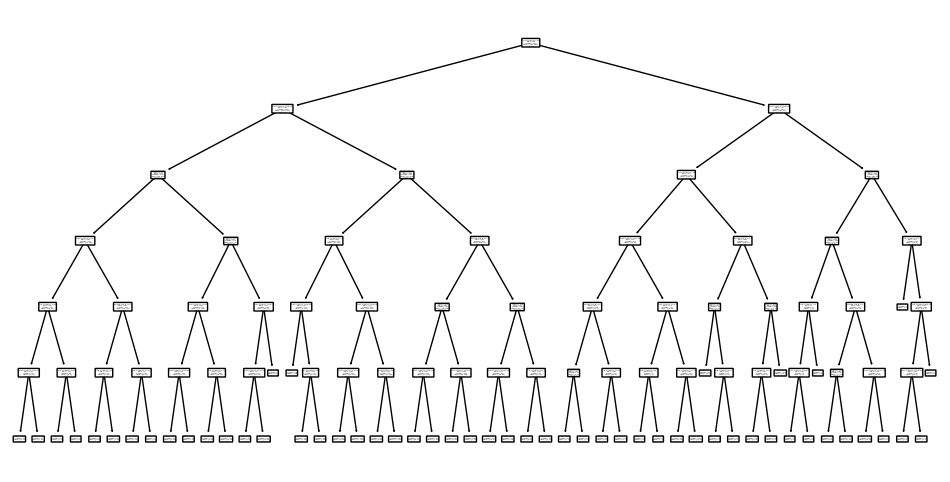

In [18]:
plt.figure(figsize=(12, 6))
plot_tree(train_tree, feature_names=X_train.columns, class_names=train_tree.classes_, rounded=True)

In [21]:
# make prediction on train obeservations

y_pred = train_tree.predict(X_train)
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [23]:
y_pred_prob = train_tree.predict_proba(X_train)
y_pred_prob

array([[0.4223301 , 0.5776699 ],
       [0.82142857, 0.17857143],
       [0.66666667, 0.33333333],
       ...,
       [0.99438202, 0.00561798],
       [0.98757764, 0.01242236],
       [0.96969697, 0.03030303]])

In [24]:
train_tree.score(X_train, y_train)

0.8089249492900609

In [27]:
# confusion matrix

pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,3288,334
1,608,700


In [26]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,No,Yes
No,3288,334
Yes,608,700


In [28]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      3622
         Yes       0.68      0.54      0.60      1308

    accuracy                           0.81      4930
   macro avg       0.76      0.72      0.74      4930
weighted avg       0.80      0.81      0.80      4930



In [29]:
train_tree.score(X_val, y_val)

0.7935606060606061

In [30]:
y_pred = train_tree.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86       776
         Yes       0.64      0.52      0.57       280

    accuracy                           0.79      1056
   macro avg       0.74      0.71      0.72      1056
weighted avg       0.78      0.79      0.79      1056



In [31]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=77)

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, random_state=77)

In [33]:
print(rf.feature_importances_)

[0.10921192 0.28280421 0.01241193 0.2303451  0.01595336 0.19918407
 0.15008941]


In [36]:
y_pred = rf.predict(X_train)
# forest predictions

In [37]:
rf.score(X_test, y_test)
# accuracy score

0.7899716177861873

In [38]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)
# confusion matrix as a dataframe

,No,Yes
No,3337,285
Yes,647,661


In [39]:
print(classification_report(y_train, y_pred))
# classification report

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      3622
         Yes       0.70      0.51      0.59      1308

    accuracy                           0.81      4930
   macro avg       0.77      0.71      0.73      4930
weighted avg       0.80      0.81      0.80      4930



In [40]:
rf.score(X_val, y_val)
# validate accuracy score

0.8020833333333334

In [46]:
logit = LogisticRegression(C=1, random_state=42, intercept_scaling=1, solver='lbfgs')
# creating a logistical regression

In [47]:
logit.fit(X_train, y_train)
# fitting the model

LogisticRegression(C=1, random_state=42)

In [48]:
print(logit.coef_)
print(logit.intercept_)

[[-2.01970970e-01 -8.99470288e-01 -3.84673315e-01 -5.18377185e-02
   2.12900836e-01  2.28587241e-02  1.81752015e-04]]
[0.10040047]


In [49]:
y_pred = logit.predict(X_train)
# preditctions

In [50]:
logit.score(X_train, y_train)
# accuracy score

0.7929006085192698

In [51]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)
# confusion matrix

,No,Yes
No,3258,364
Yes,657,651


In [65]:
print(classification_report(y_train, y_pred))
# classification report

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      3622
         Yes       0.64      0.50      0.56      1308

    accuracy                           0.79      4930
   macro avg       0.74      0.70      0.71      4930
weighted avg       0.78      0.79      0.78      4930



In [76]:
telco_cust = acquire.get_telco_data(get_connection)
telco_cust = telco_cust.drop(['Unnamed: 0','gender', 'senior_citizen', 'partner', 'phone_service', 'tech_support', 'streaming_tv', 
                    'streaming_movies', 'paperless_billing', 'internet_service_type', 'online_security', 'online_backup', 
                    'device_protection', 'internet_service_type_id', 'payment_type_id', 'contract_type_id', 'dependents', 
                    'tenure', 'multiple_lines', 'monthly_charges', 'total_charges', 'churn', 'contract_type', 'payment_type']
                   , axis =1)
telco_cust
# prepping a new data frame to convert to the csv file

,customer_id
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7038,9987-LUTYD
7039,9992-RRAMN
7040,9992-UJOEL
7041,9993-LHIEB


In [77]:
churn_prob = rf.predict_proba(X_test)
churn_prob = pd.DataFrame(churn_prob)
churn_prob.drop(columns = 1)
# grabbing retention probability

,0
0,0.358084
1,0.977498
2,0.640611
3,0.919277
4,0.974504
...,...
1052,0.446795
1053,0.419733
1054,0.507693
1055,0.721356


In [78]:
pred_churn = rf.predict(X_test)
pred_churn = pd.DataFrame(pred_churn)
pred_churn = pred_churn.rename(columns ={0 : 'Churn'})
# predicting the churn in a yes no format

In [79]:
predictions = pd.concat([telco_cust, churn_prob, pred_churn], axis = 1).dropna().drop(columns = 1)
predictions = predictions.rename(columns = {0 : 'Retention Chance'})
predictions
#concat the dataframe together to make a prediction csv

,customer_id,Retention Chance,Churn
0,0002-ORFBO,0.358084,Yes
1,0003-MKNFE,0.977498,No
2,0004-TLHLJ,0.640611,No
3,0011-IGKFF,0.919277,No
4,0013-EXCHZ,0.974504,No
...,...,...,...
1052,1536-YHDOE,0.446795,Yes
1053,1539-LNKHM,0.419733,Yes
1054,1541-ETJZO,0.507693,No
1055,1543-LLLFT,0.721356,No


In [80]:
predictions.to_csv('final_predictions.csv')
#creates the csv file